In [24]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import zoom
import os

In [25]:
img = nib.load('data/training/img/img0008.nii.gz')
data = img.get_fdata()
print(np.shape(data))
print(np.ndarray.max(data))
print(np.ndarray.min(data))

(512, 512, 148)
3071.0
-1024.0


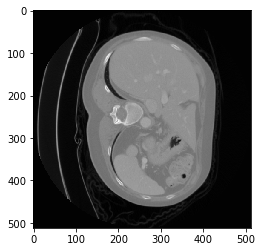

In [26]:
%matplotlib inline
plt.imshow(data[:,:,120], cmap='gray')
plt.show()

In [27]:
imglabel = nib.load('data/training/label/label0008.nii.gz')
datalabel = imglabel.get_fdata()

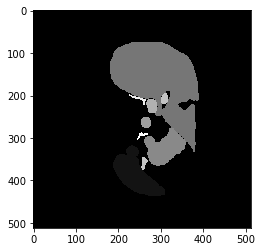

In [28]:
%matplotlib inline
plt.imshow(datalabel[:,:,120], cmap='gray')
plt.show()

In [29]:
# smallerCT = cv2.resize(datalabel, dsize=(256, 256), interpolation=cv2.INTER_AREA)

(512, 512, 148)
(128, 128, 148)


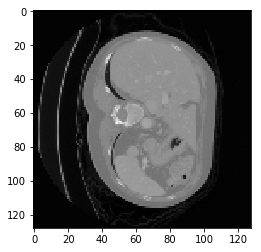

In [30]:
print(np.shape(data))
# scale = np.round(130/np.shape(data)[2], decimals=2)
# scale = 1
# print(scale)
# data = zoom(data, (0.5, 0.5, scale))
data = data[0:511:4, 0:511:4, :]
print(np.shape(data))
%matplotlib inline
plt.imshow(data[:,:,120], cmap='gray')
plt.show()

(128, 128, 148)


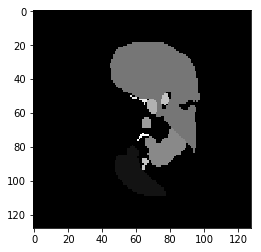

<class 'numpy.ndarray'>


In [31]:
# datalabel = zoom(datalabel, (0.5, 0.5, scale)).astype(int)
# datalabel = np.round(cv2.resize(datalabel, dsize=(256, 256), interpolation=cv2.INTER_AREA))
datalabel = datalabel[0:511:4, 0:511:4, :]
print(np.shape(datalabel))
%matplotlib inline
plt.imshow(datalabel[:,:,120], cmap='gray')
plt.show()
print(type(datalabel))

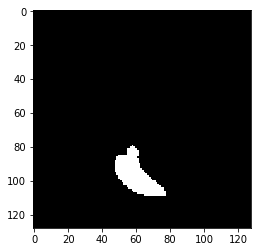

In [32]:
%matplotlib inline
spleenlabel = datalabel
spleenlabel[np.where(spleenlabel != 1)] = 0
plt.imshow(spleenlabel[:,:,120], cmap='gray')
plt.show()

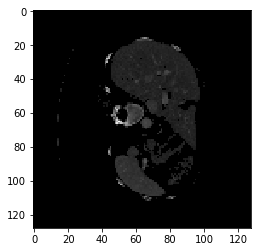

In [33]:
%matplotlib inline
spleen = data
spleen[np.where(spleen < 100)] = 0
plt.imshow(spleen[:,:,120], cmap='gray')
plt.show()

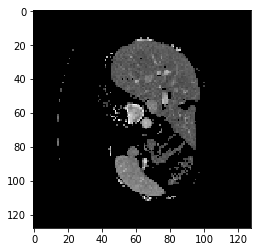

In [34]:
%matplotlib inline
spleen[np.where(spleen > 400)] = 0
plt.imshow(spleen[:,:,120], cmap='gray')
plt.show()

In [35]:
spleenslices = np.sum(spleenlabel, axis=(0, 1), keepdims=False)
numslices = np.shape(spleenslices)[0]
print(numslices)
numspleenslices = np.shape(np.where(spleenslices))[1]
print(numspleenslices)
float(numspleenslices)/numslices

148
27


0.18243243243243243

In [36]:
folder = 'data/training/label/'
numslicestotal = np.zeros((1, 30), int)
numspleenstotal = np.zeros((1, 30), int)
index = 0
for filename in os.listdir(folder):
    label = nib.load(folder+filename).get_fdata()
    label = label[0:511:4, 0:511:4, :]
    spleenlabel = label
    spleenlabel[np.where(spleenlabel != 1)] = 0
    spleenslices = np.sum(spleenlabel, axis=(0, 1), keepdims=False)
    numslices = np.shape(spleenslices)[0]
    numspleenslices = np.shape(np.where(spleenslices))[1]
    numslicestotal[0, index] = numslices
    numspleenstotal[0, index] = numspleenslices
    index = index+1

In [39]:
print(numslicestotal)
print(np.sum(numslicestotal, axis=(1)))
print(np.sum(numslicestotal, axis=(1))/30)

[[148 140 144 131  89 153  98 100 131 148 139 124 184  89 104 143 149 117
   96 195  93 163 198  94  88  90 147  85 100  99]]
[3779]
[125.96666667]


In [40]:
concat = nib.load('data/training/img/img_concatenated.nii.gz').get_fdata()

In [41]:
np.shape(concat)

(128, 128, 3779)

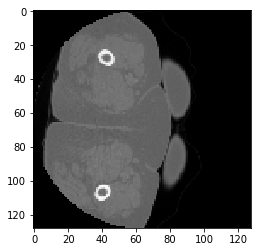

In [52]:
%matplotlib inline
plt.imshow(concat[:,:,0], cmap='gray')
plt.show()